# Deep learning model for tranning

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model=tf.keras.applications.mobilenet.MobileNet()

In [4]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Transfer Learning- tuning,weights will start from last checkpoint

In [5]:
base_input=model.layers[0].input

In [6]:
base_output=model.layers[-4].output

In [7]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [8]:
new_model=keras.Model(inputs=base_input, outputs=final_output)

In [9]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Binary classification

In [13]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
import pickle
pickle_in=open("X_pickle","rb")
X=pickle.load(pickle_in)
pickle_in.close()

pickle_in=open("Y_pickle","rb")
Y=pickle.load(pickle_in)
pickle_in.close()

In [15]:
history=new_model.fit(X,Y,epochs=3,validation_split=0.1)

Epoch 1/3
39/39 [==============================] - 122s 3s/step - loss: 0.0575 - accuracy: 0.9750 - val_loss: 0.0082 - val_accuracy: 0.9928
Epoch 2/3
39/39 [==============================] - 110s 3s/step - loss: 0.0504 - accuracy: 0.9919 - val_loss: 0.1120 - val_accuracy: 0.9928
Epoch 3/3
39/39 [==============================] - 110s 3s/step - loss: 0.0125 - accuracy: 0.9952 - val_loss: 1.2210e-06 - val_accuracy: 1.0000


In [16]:
new_model.save('my_model.h5')

In [11]:
model = tf.keras.models.load_model('my_model.h5')

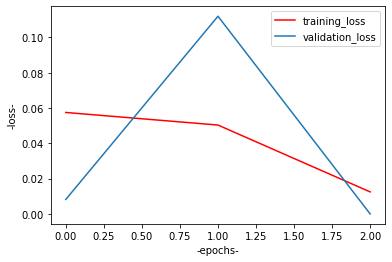

In [22]:
plt.plot(history.history['loss'],'r',label='training_loss')                                                                            
plt.plot(history.history['val_loss'],label='validation_loss')
plt.ylabel('-loss-')
plt.xlabel('-epochs-')
plt.legend()
plt.show()

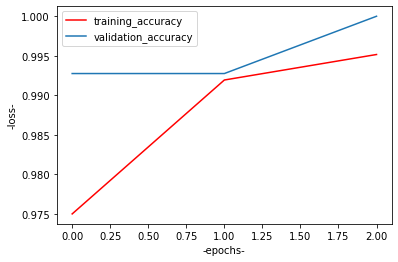

In [23]:
plt.plot(history.history['accuracy'],'r',label='training_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.ylabel('-loss-')
plt.xlabel('-epochs-')
plt.legend()
plt.show()
